> [GNN-Static](https://arxiv.org/abs/2210.08864) - it plans a trajectory by prioritizing the edge to explore based on a Graph Neural Network heuristic function

In [1]:
%cd -q ..

In [2]:
from environment.static.ur5_env import UR5Env
from objects.static.voxel import VoxelObject
from wrappers.obstacles import ObstaclePositionWrapper
from data.dataset import create_data_from_yaml
data_dict = create_data_from_yaml('data/static/ur5_env/0.yml')
env, start, goal = data_dict['env'], data_dict['start'], data_dict['goal']
env = ObstaclePositionWrapper(env)

pybullet build time: Nov 28 2023 23:51:11


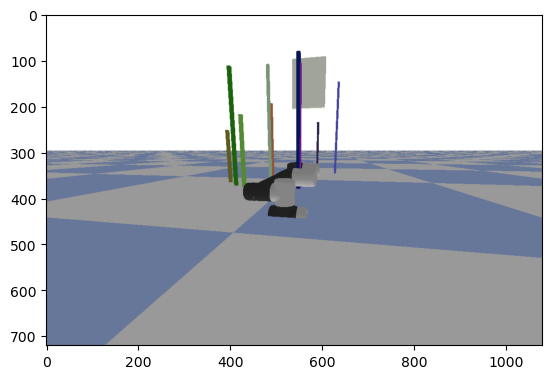

In [3]:
# visualize environment
%matplotlib inline
import matplotlib.pyplot as plt
env.load()
plt.imshow(env.render())
plt.show()

In [4]:
from planner.learned.GNN_static_planner import GNNStaticPlanner

In [5]:
import numpy as np
start = np.array(start)
goal = np.array(goal)
result = GNNStaticPlanner(num_batch=100, model_args=dict(config_size=env.robot.config_dim, 
                                                                    embed_size=64, 
                                                                    obs_size=6)).plan(env, start, goal, timeout=('time', 100))

In [6]:
# Visualization
from time import sleep
def visualize_traj(env, trajectory):  
    gifs = []
    for timestep in np.linspace(0, len(trajectory.waypoints)-1, 100):
        env.robot.set_config(trajectory.get_spec(timestep))
        p.performCollisionDetection()
        sleep(0.1)
        gifs.append(p.getCameraImage(width=360, height=360, lightDirection=[1, 1, 1], shadow=1,
                                                 renderer=p.ER_BULLET_HARDWARE_OPENGL)[2]) 
    return gifs

argv[0]=--background_color_red=1.0
argv[1]=--background_color_green=1.0
argv[2]=--background_color_blue=1.0
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=5
argv[0] = --unused
argv[1] = --background_color_red=1.0
argv[2] = --background_color_green=1.0
argv[3] = --background_color_blue=1.0
argv[4] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=NVIDIA GeForce RTX 4090/PCIe/SSE2
GL_VERSION=3.3.0 NVIDIA 535.154.05
GL_SHADING_LANGUAGE_VERSION=3.30 NVIDIA via Cg compiler
pthread_getconcurrency()=0
Version = 3.3.0 NVIDIA 535.154.05
Vendor = NVIDIA Corporation
Renderer = NVIDIA GeForce RTX 4090/PCIe/SSE2
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
sta


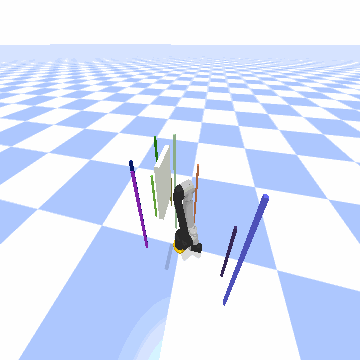

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import numpy as np
from utils.utils import save_gif
from IPython.display import HTML
import base64
from objects.trajectory import WaypointLinearTrajectory

env.load(GUI=True)
# generate collision-free trajectory
traj = WaypointLinearTrajectory(result.solution)    
gifs = visualize_traj(env, traj)
save_gif(gifs, f'data/visualization/static_gnn.gif')
b64 = base64.b64encode(open(f'data/visualization/static_gnn.gif', 'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))    

In [8]:
p.disconnect()

numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
destroy semaphore
semaphore destroyed
Thread TERMINATED
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
